In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics 

In [20]:
gd=pd.read_csv('grades.csv')

In [21]:
gd.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [22]:
gd.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [23]:
gd.shape

(571, 43)

In [24]:
gd.info

<bound method DataFrame.info of      Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-4

In [25]:
le=LabelEncoder()
gd['PH-121']=le.fit_transform(gd['PH-121'])

list1=['PH-121','HS-101','CY-105','HS-105/12','MT-111','CS-105','CS-106','EL-102','EE-119','ME-107','CS-107','HS-205/20','MT-222','EE-222','MT-224','CS-210','CS-211','CS-203','CS-214','EE-217','CS-212','CS-215','MT-331','EF-303','HS-304','CS-301','CS-302','TC-383','MT-442','EL-332','CS-318','CS-306','CS-312','CS-317','CS-403','CS-421','CS-406','CS-414','CS-419','CS-423','CS-412']
for val in list1:
    gd[val]=le.fit_transform(gd[val].astype(str))
    
gd    

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,8,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,CS-97002,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,CS-97003,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,CS-97004,12,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,CS-97005,5,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,6,0,0,2,1,0,2,2,1,...,2,2,0,0,0,4,4,3,0,3.798
567,CS-97568,1,0,0,0,0,0,0,2,0,...,4,4,0,0,2,3,2,6,2,3.772
568,CS-97569,6,0,2,4,0,0,0,0,0,...,2,3,0,4,0,6,4,2,2,3.470
569,CS-97570,0,4,9,0,9,10,5,8,5,...,9,3,3,8,9,6,3,5,6,2.193


In [26]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    int32  
 2   HS-101     571 non-null    int32  
 3   CY-105     571 non-null    int32  
 4   HS-105/12  571 non-null    int32  
 5   MT-111     571 non-null    int32  
 6   CS-105     571 non-null    int32  
 7   CS-106     571 non-null    int32  
 8   EL-102     571 non-null    int32  
 9   EE-119     571 non-null    int32  
 10  ME-107     571 non-null    int32  
 11  CS-107     571 non-null    int32  
 12  HS-205/20  571 non-null    int32  
 13  MT-222     571 non-null    int32  
 14  EE-222     571 non-null    int32  
 15  MT-224     571 non-null    int32  
 16  CS-210     571 non-null    int32  
 17  CS-211     571 non-null    int32  
 18  CS-203     571 non-null    int32  
 19  CS-214     571 non-null    int32  
 20  EE-217    

In [10]:
gd.isnull().sum ()

PH-121       0.0
HS-101       0.0
CY-105       0.0
HS-105/12    0.0
MT-111       0.0
CS-105       0.0
CS-106       0.0
EL-102       0.0
EE-119       0.0
ME-107       0.0
CS-107       0.0
HS-205/20    0.0
MT-222       0.0
EE-222       0.0
MT-224       0.0
CS-210       0.0
CS-211       0.0
CS-203       0.0
CS-214       0.0
EE-217       0.0
CS-212       0.0
CS-215       0.0
MT-331       0.0
EF-303       0.0
HS-304       0.0
CS-301       0.0
CS-302       0.0
TC-383       0.0
MT-442       0.0
EL-332       0.0
CS-318       0.0
CS-306       0.0
CS-312       0.0
CS-317       0.0
CS-403       0.0
CS-421       0.0
CS-406       0.0
CS-414       0.0
CS-419       0.0
CS-423       0.0
CS-412       0.0
dtype: float64

<AxesSubplot:>

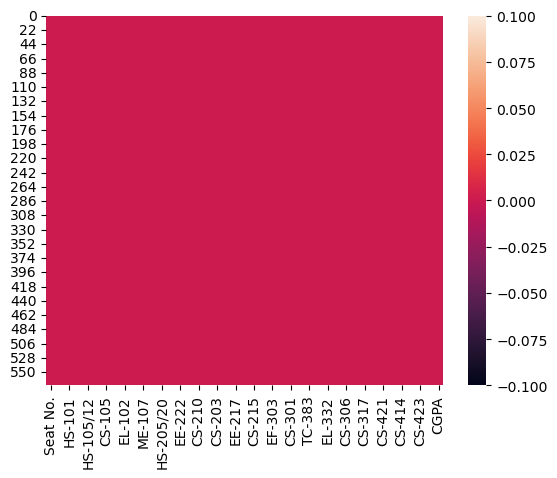

In [27]:
sns.heatmap(gd.isnull())

In [45]:
X = gd.drop(['Seat No.', 'CGPA'], axis=1)
Y = gd['CGPA']

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [42]:
print(X.shape,X_train.shape,X_test.shape)

(571, 41) (456, 41) (115, 41)


In [43]:
regressor = LinearRegression()

In [47]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [48]:
training_data_prediction=regressor.predict(X_train)

In [51]:
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R Squared vale:',r2_train)

R Squared vale: 0.9477203678427055


In [52]:
test_data_prediction = regressor.predict(X_test)

In [53]:
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print('R squared vale :',r2_test)

R squared vale : 0.9555230197995123


In [57]:
input_data = (8,10,8,6,8,10,9,8,5,8,8,4,9,2,5,7,10,10,9,0,9,8,6,7,7,3,6,7,4,6,8,6,8,8,8,8,2,0,8,3,2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print(prediction)
print('CGPA of a student  is ',prediction[0])

[2.22313985]
CGPA of a student  is  2.22313985295534


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
